<a href="https://colab.research.google.com/github/RBotL/Plant/blob/main/Final_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import seaborn as sns
%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive')
#%cd drive/MyDrive/Plant

Mounted at /content/drive


In [3]:
!unzip -q "/content/drive/MyDrive/Plant/code_finalReport/New_Plant_disease_dataset.zip" -d "/content"

In [4]:

#Fetching the images for the train set
folder_path = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/"
X_train=[]
y_train=[]
y2_train=[]

width = 64
height = 64 
for path, dirs, files in os.walk(folder_path):
    for file_name in dirs:
        files_path=folder_path+file_name
        for images in os.listdir(files_path):
            img=cv2.imread(files_path+'/'+images, cv2.IMREAD_COLOR)
            img_resized = cv2.resize(img, (width,height))
            X_train.append(np.array(img_resized))
            y_train.append(file_name.split('___')[0])   #plant name
            y2_train.append(file_name.split('___')[1]) #disease



In [5]:
#Fetching the images for the test set
folder_path = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/"
X_test=[]
y_test=[]
y2_test=[]

width = 64
height = 64

for path, dirs, files in os.walk(folder_path):
    for file_name in dirs:
        files_path=folder_path+file_name
        for images in os.listdir(files_path):
            img=cv2.imread(files_path+'/'+images, cv2.IMREAD_COLOR)
            img_resized = cv2.resize(img, (width,height))
            X_test.append(np.array(img_resized))
            y_test.append(file_name.split('___')[0])   #plant name
            y2_test.append(file_name.split('___')[1]) #disease

In [6]:
df1 = pd.DataFrame(y_train, columns=['plant'])
df2 = pd.DataFrame(y2_train, columns=['disease'])
df_train = pd.concat([df1, df2], axis=1)
df_train['healthy'] = (df_train['disease']=="healthy")*1
df_train.head()

,plant,disease,healthy
0,Raspberry,healthy,1
1,Raspberry,healthy,1
2,Raspberry,healthy,1
3,Raspberry,healthy,1
4,Raspberry,healthy,1


In [7]:
df1 = pd.DataFrame(y_test, columns=['plant'])
df2 = pd.DataFrame(y2_test, columns=['disease'])
df_test = pd.concat([df1, df2], axis=1)
df_test['healthy'] = (df_test['disease']=="healthy")*1
df_test.head()

,plant,disease,healthy
0,Raspberry,healthy,1
1,Raspberry,healthy,1
2,Raspberry,healthy,1
3,Raspberry,healthy,1
4,Raspberry,healthy,1


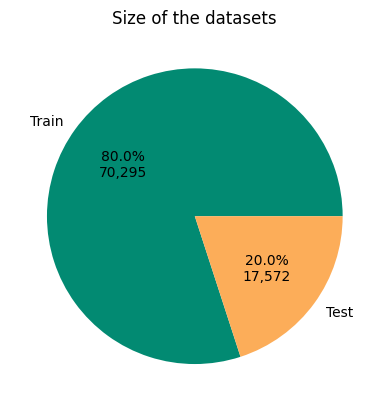

In [8]:
# Plotting size comparison of Train and Test sets
sizes = np.array((df_train.shape[0], df_test.shape[0]))

def my_fmt(x):
    a  = np.round(x/100.*sizes.sum(), 0)
    return '{:.1f}%\n{:,.0f}'.format(x, a)

plt.pie([70295, 17572], labels=['Train', 'Test'], autopct=my_fmt, colors=['#028a72', '#fcad59'])
plt.title('Size of the datasets');

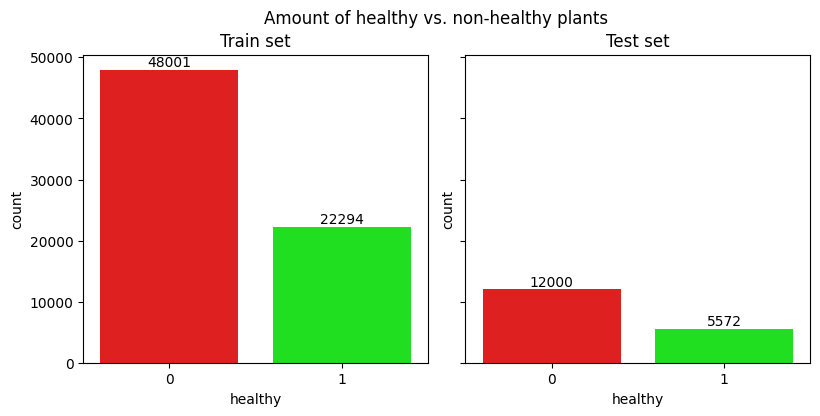

In [9]:
# Plotting distribution of healthy vs. non-healthy plants images

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharey=True)
colors = ['#ff0000', '#00ff00']
plt.suptitle("Amount of healthy vs. non-healthy plants", fontsize=12)
fig.tight_layout() # to minimize overlapping

# plot train data
sns.countplot(data = df_train, x = 'healthy', palette=colors, ax=axes[0])
axes[0].set_title("Train set")
axes[0].bar_label(axes[0].containers[0])

# plot test data
sns.countplot(data = df_test, x = 'healthy', palette=colors, ax=axes[1])
axes[1].set_title("Test set")
axes[1].bar_label(axes[1].containers[0]);

Number of plant categories: 14


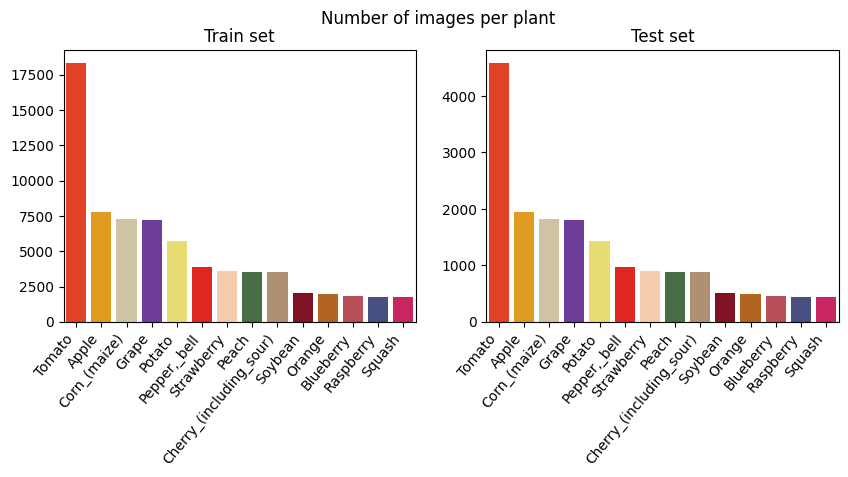

In [10]:
# Plotting the number of images for each plant
print('Number of plant categories:', len(df_train.plant.unique()))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
colors = ['#ff2c06', '#FFA500', '#d7c49e', '#6f2da8', '#fbec5d', '#ff0800', '#ffcba4', '#44743d', '#b79268', 
          '#910118', '#CA6309', '#c83f49', '#3E4989', '#E30B5C']
plt.suptitle("Number of images per plant", fontsize=12)
fig.autofmt_xdate(rotation=50) # rotating x labels

# plot train data
sns.barplot(x=df_train['plant'].value_counts().index,
            y=df_train['plant'].value_counts().values,
            palette=colors, ax=axes[0])
axes[0].set_title("Train set")

# plot test data
sns.barplot(x=df_test['plant'].value_counts().index,
            y=df_test['plant'].value_counts().values,
            palette=colors, ax=axes[1])
axes[1].set_title("Test set");

Number of categories: 38 



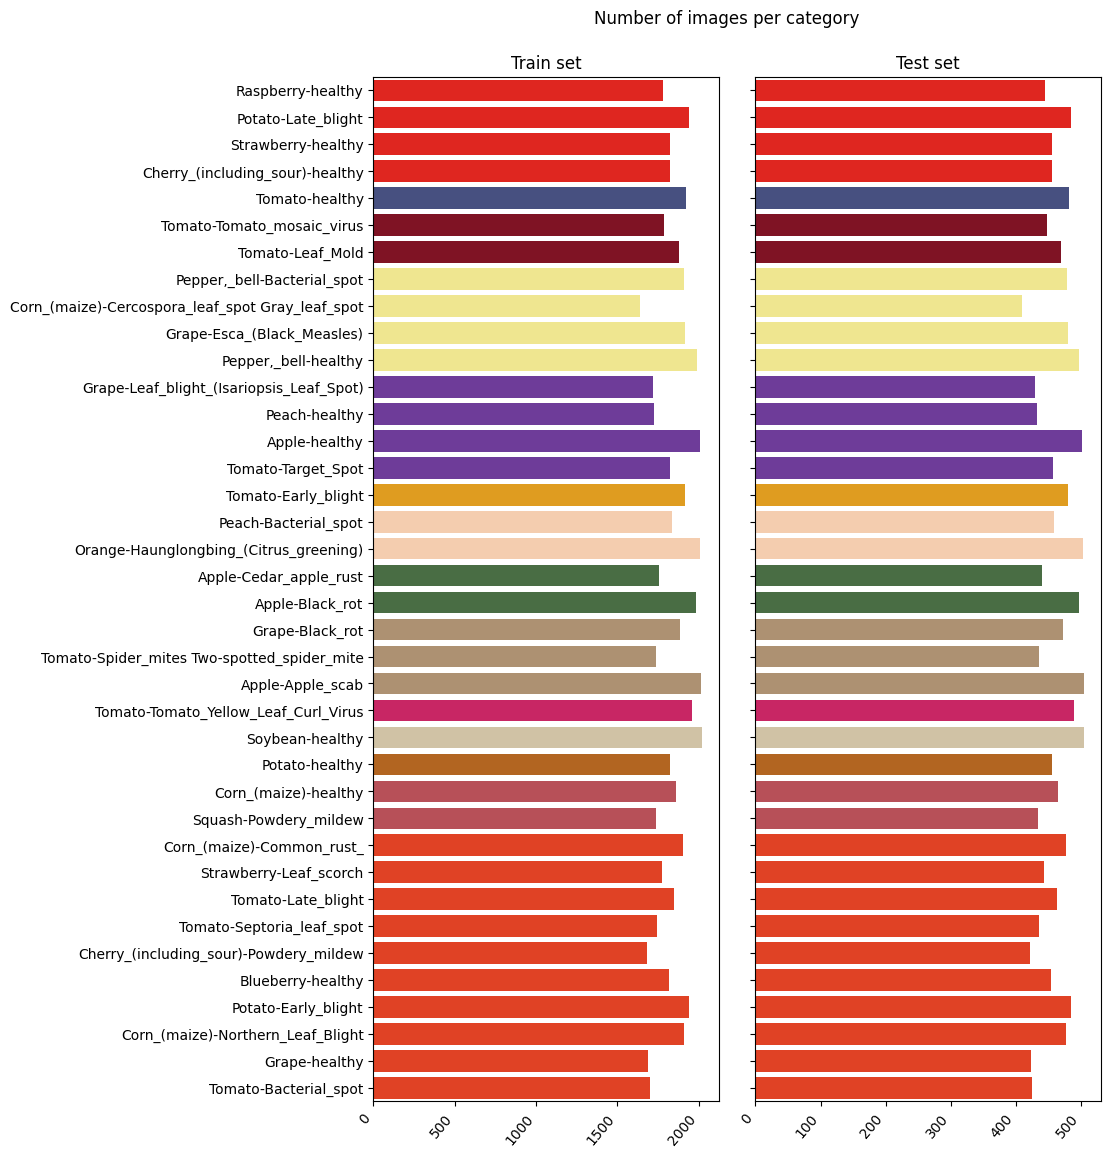

In [11]:
#Plot number of images per category
def plantstat(df):
    df['plantstat'] = df['plant'] + '-' + df['disease']
    return df
df = plantstat(df_train)
print('Number of categories:', len(df.plantstat.unique()), '\n')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 14), sharey=True)
colors = ['#ff0800', '#ff0800', '#ff0800', '#ff0800', '#3E4989', '#910118', '#910118', '#FFF380',
          '#FFF380', '#FFF380', '#FFF380', '#6f2da8', '#6f2da8', '#6f2da8', '#6f2da8','#FFA500',
          '#ffcba4', '#ffcba4', '#44743d', '#44743d', '#b79268', '#b79268', '#b79268','#e30b5d',
          '#d7c49e', '#CA6309', '#c83f49', '#c83f49', '#ff2c06', '#ff2c06', '#ff2c06', '#ff2c06',
          '#ff2c06', '#ff2c06', '#ff2c06', '#ff2c06', '#ff2c06', '#ff2c06']

plt.suptitle("Number of images per category", fontsize=12)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])
fig.autofmt_xdate(rotation=50) # rotating x labels

# plot train data
df = plantstat(df_train)
sns.countplot(y=df.plantstat, palette = colors, ax=axes[0])
axes[0].set_title("Train set")
axes[0].set_xlabel(None)
axes[0].set_ylabel(None)

# plot test data
df = plantstat(df_test)
sns.countplot(y=df.plantstat, palette = colors, ax=axes[1])
axes[1].set_title("Test set")
axes[1].set_xlabel(None)
axes[1].set_ylabel(None);